## __Statistical and Linguistic Insights for Model Explanation - SLIME__ 
### __Fine-tuning custom LLM for classification__
<font size=3>

To enhance the LLM for classification tasks, we can adapt the $\mathtt{CustomModel}$ class to perform neural network (NN) modeling using the following approaches:

Use the $\mathtt{FitModel().fit()}$ method when the dataset is sufficiently large for both training and validation.
Use the $\mathtt{FitModel().kfold()}$ method when the dataset is too small to split directly into training and validation sets.
After completing the NN modeling, the final training step is performed using the $\mathtt{FitModel().fit()}$ method.

In [1]:
from slime_nlp.dataset import ImportData
from slime_nlp.model import CustomModel, FitModel

### __1. Fine-tuning: for train and validation data__
<font size=3>

- Using $\mathtt{ImportData}$ to split the dataset into train, validation, and test data;
- Using $\mathtt{FitModel.fit()}$ for train and validation.

In [2]:
ID = ImportData(path_name="../dataset/adress_all.csv", n_val=0.15, n_test=0.1, 
                group_by=['text', 'group'], verbose=True)

train_data = ID.train
val_data = ID.val
test_data = ID.test

DataFrame:
                                                 text  group
0  well the little girl is saying to be uiet to h...      0
1  mhm . well the water's running over on the flo...      0
2  look at the picture <unintelligible> . oh okay...      0

Data length: N_total = 156
N-train = 118, N-val = 23, N-test = 15



In [3]:
fm = FitModel(device='cpu')

print(fm.__doc__)


    # FitModel: CustomModel model fitting.

    Input: (device='cpu', optimizer='AdamW', lr=2e-5, lr_sub=2e-4, eps=1e-8)
    -----
    - device (str): select CPU or GPU for training.
    - optimizer (str): training optimizer name.
    - lr (float): learning-rate for AutoModel's LLM weights adjustment.
    - lr_sub (float): learning-rate for weights adjustment of the CustomModel's 
    additional layer block.
    - eps (float): optimizer constant for numerical stability.

    Methods:
    -------
    - train_step (X, y):
      -- X (Tensor): CustomModel input data.
      -- y (Tensor): tensor of numerical labels.

      Returns (Tensor) the loss function value.

    - fit (train_data, val_data=None, epochs=1, batch_size=1, pretrained_name="google-bert/bert-base-cased",
    klabel='', path_name=None, patience=0, min_delta=1e-2):
      -- train_data (Dataframe): pandas dataframe (ImportData's output) with "text"(str) 
      and "group"(int) columns.
      -- val_data (Dataframe): equival

In [4]:
fm.fit(train_data, val_data, epochs=5)

#Epoch 1/5:
Batch:99% - <train-loss> = 7.107e-01
<validation-metric>: Acc = 4.783e-01, F1 = 6.471e-01
Time taken: 73.74s

#Epoch 2/5:
Batch:99% - <train-loss> = 6.852e-01
<validation-metric>: Acc = 4.783e-01, F1 = 6.471e-01
Time taken: 78.58s

#Epoch 3/5:
Batch:99% - <train-loss> = 6.489e-01
<validation-metric>: Acc = 4.783e-01, F1 = 6.471e-01
Time taken: 72.60s

#Epoch 4/5:
Batch:99% - <train-loss> = 4.579e-01
<validation-metric>: Acc = 9.130e-01, F1 = 9.091e-01
Time taken: 66.13s

#Epoch 5/5:
Batch:99% - <train-loss> = 3.483e-01
<validation-metric>: Acc = 9.130e-01, F1 = 9.000e-01
Time taken: 67.60s



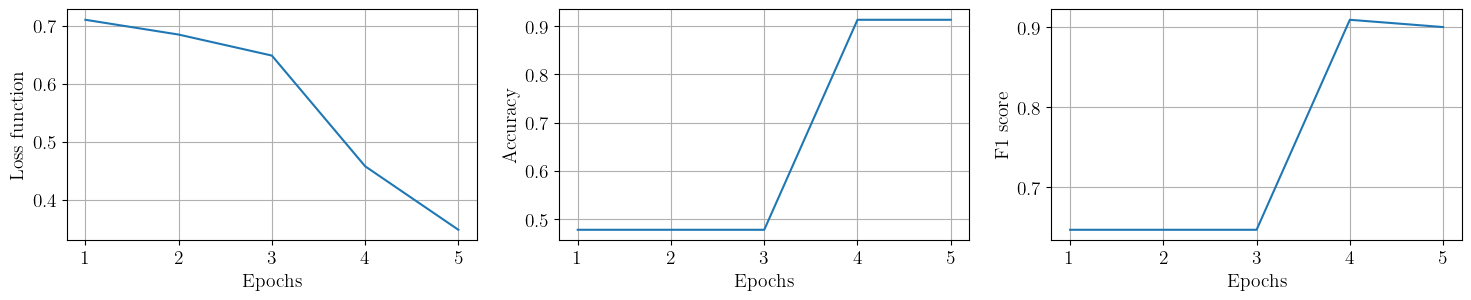

In [5]:
fm.plot_metric() 

### __2. Fine-tuning: for K-fold cross-validation.__
<font size=3>

- Using $\mathtt{ImportData}$ to split the dataset into train and test data;
- Using $\mathtt{FitModel.kfold()}$ for K-fold cross-validation.

In [6]:
ID = ImportData(path_name="../dataset/adress_all.csv", n_val=0.0, n_test=0.1,
                group_by=['text', 'group'], verbose=True)

train_data = ID.train
test_data = ID.test

DataFrame:
                                                 text  group
0  well the little girl is saying to be uiet to h...      0
1  mhm . well the water's running over on the flo...      0
2  look at the picture <unintelligible> . oh okay...      0

Data length: N_total = 156
N-train = 141, N-val = 0, N-test = 15



In [7]:
fm = FitModel(device='cpu')

# To fit train data in K-fold cross validation, uncoment the following line:

# fm.kfold(train_data, K=5, batch_size=2, epochs=30)

In [8]:
# To show plot results, uncoment the following line:

# fm.plot_metric() 

### __3. Fine-tuning: for final training after NN modeling.__
<font size=3>

- Using $\mathtt{ImportData}$ to split the dataset into train and test data;
- Using $\mathtt{FitModel.fit()}$ for final training.

In [9]:
ID = ImportData(path_name="../dataset/adress_all.csv", n_val=0.0, n_test=0.1,
                group_by=['text', 'group'], verbose=True)

train_data = ID.train
test_data = ID.test

DataFrame:
                                                 text  group
0  well the little girl is saying to be uiet to h...      0
1  mhm . well the water's running over on the flo...      0
2  look at the picture <unintelligible> . oh okay...      0

Data length: N_total = 156
N-train = 141, N-val = 0, N-test = 15



In [10]:
fm = FitModel(device='cpu')

# To make the final training, uncoment the following line:

#fm.fit(train_data, epochs=2)

In [11]:
# To evaluate the model with the test data, uncoment the following line:

#fm.evaluate(test_data)

### __4. Making predictions:__

In [12]:
model = CustomModel().to('cpu')

print(model.__doc__)


    # CustomModel: Custom LLM for classification

    Input: (pretrained_name="google-bert/bert-base-cased")
    ----- 
    - pretained_name (str): pretrained model name from huggingface.co repository.

    Returns object with callable model's input.

    
    Methods:
    -------
    - forward = __call__: (input_ids, token_type_ids=None, attention_mask=None)
      -- input_ids (Tensor[int]): sequence of special tokens IDs.
      -- token_type_ids (Tensor[int]): sequence of token indices to distinguish 
      between sentence pairs.
      -- attention_mask (Tensor[int]): mask to avoid performing attention on padding 
      token indices.

      Returns a Tensor with linear prediction output.
    
    - load: (path_name="weights/model_weights.pt", device='cpu') 
      Loads model's weights.
      
      -- path_name (str): string with path and name of the model's weights (.pt)
      for saving.
      -- device (str): select CPU or GPU for prediction processing.
    
    - predict: (dat

In [13]:
# Loadding the model parameters and making predictions:
model.load("../weights/best_model.pt")

pred = model.predict(test_data)
pred

tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.])